## TO-DO
- Face Classification
- Look into Kernel Tricks

# Support Vector Machine (SVM)

- Supervised machine learning algorithm
- used in both the classification and regression tasks
- aims to find the most optimal hyperplane
- the goal is to maximize the margin between the two classes

### Why and when to use?
- It is robust to high-dimensional data.
- Works well with small to medium sized dataset
- Effective when classes are separable (even effective using kernels)

---

- Binary and multiclass classification:
    - Spam detection
    - Image classification (e.g., face vs. non-face)
    - Text classification
- Anomaly detection
- Handwriting recognition

# What is hyperplane

Hyperplane is a line or 2D plane dividing 3D space

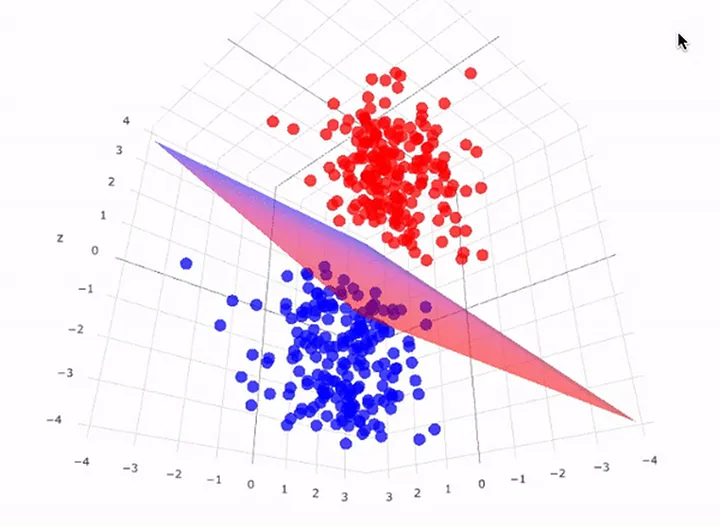

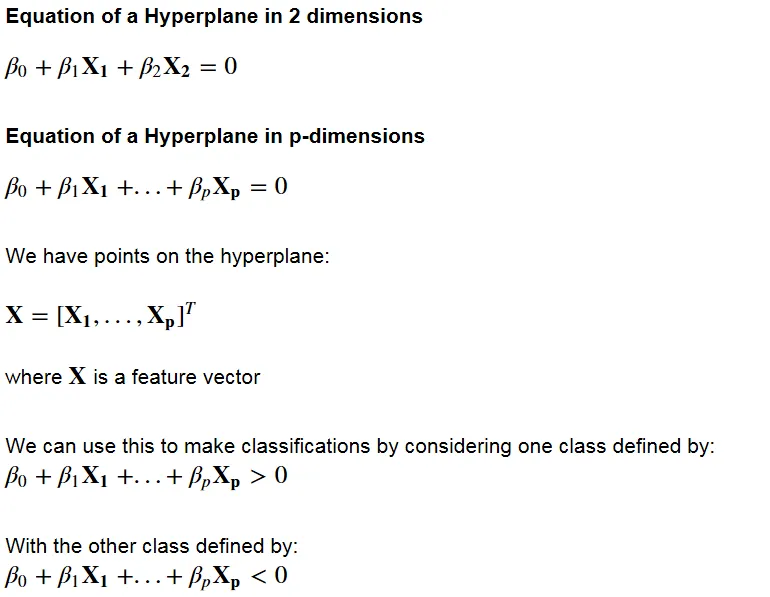

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Import the dataset
df_ = datasets.load_iris()
df = pd.DataFrame()
df['petal_length'] = df_['data'][:,2]
df['petal_width'] = df_['data'][:,3]
df['target'] = df_['target'] == 1

In [77]:
# Define train and test sets
X_train, X_test, y_train, y_test = train_test_split(df[['petal_length', 'petal_width']], 
                                        df['target'], 
                                        test_size=0.2, 
                                        random_state=42)

In [123]:
X_test.shape, y_test.shape

((30, 2), (30,))

In [104]:
# Normalize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/home/vertex/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [170]:
# 5. Train SVM on PCA-transformed data
svm = SVC(kernel='rbf',C=3)
svm.fit(X_train_scaled, y_train)

,C,3
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [171]:
# Predict test labels
y_pred = svm.predict(X_test_scaled)

In [172]:
accuracy = svm.score(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.70


In [173]:
# Print classification report (precision, recall, f1-score, support)
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

       False       0.70      1.00      0.82        21
        True       0.00      0.00      0.00         9

    accuracy                           0.70        30
   macro avg       0.35      0.50      0.41        30
weighted avg       0.49      0.70      0.58        30



/home/vertex/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/vertex/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/vertex/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [174]:
# Print confusion matrix
print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:

[[21  0]
 [ 9  0]]


In [175]:
X_test_scaled.shape, y_test.shape

((30, 2), (30,))

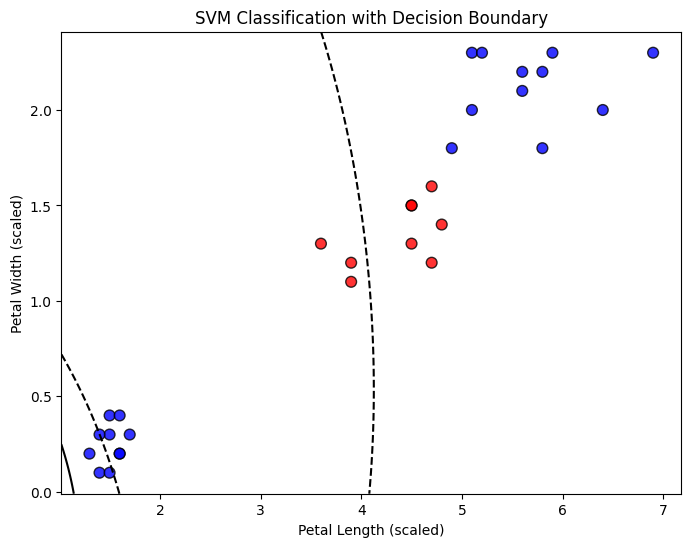

In [176]:
# Plotting function with classification and decision boundary
def plot_svm_classification(X, y, model):
    plt.figure(figsize=(8, 6))
    ax = plt.gca()

    # Scatter plot with colors by class
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', s=60, alpha=0.8)

    # Create grid to evaluate model
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 300),
                         np.linspace(ylim[0], ylim[1], 300))
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Decision function for each point on grid
    Z = model.decision_function(grid)
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and margins
    ax.contour(xx, yy, Z, levels=[-1, 0, 1], colors='k',
               linestyles=['--', '-', '--'])

    # Labels & title
    plt.xlabel('Petal Length (scaled)')
    plt.ylabel('Petal Width (scaled)')
    plt.title('SVM Classification with Decision Boundary')
    plt.show()

# Visualize on test data
plot_svm_classification(X_test_scaled, y_test, svm)